<a href="https://colab.research.google.com/github/klipbn/klip_alex/blob/main/research_of_apartments_ads_for_sales/research_of_apartments_ads_for_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В нашей распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.   
Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.   


**Этапы проведения исследования**

Шаг 1. Изучить общую информацию  

Путь к файлу: /datasets/real_estate_data.csv.  

**Шаг 2.** Предобработка данных  

Определить и изучить пропущенные значения:  
- Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
- Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
- Укажите причины, которые могли привести к пропускам в данных.

Привести данные к нужным типам:  
- Поясните, в каких столбцах нужно изменить тип данных и почему. 

**Шаг 3.** Посчитать и добавить в таблицу  

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей. 

**Шаг 4.** Провести исследовательский анализ данных и выполнить инструкции  

- Изучить следующие параметры: площадь, цена, число комнат, высота потолков. - Построить гистограммы для каждого параметра.
- Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены.
- Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `'locality_name'`.
- Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`'locality_name'`). Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
- Выделить сегмент квартир в центре. Проанализировать  эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?  

**Шаг 5.** Написать общий вывод

## Изучение данных из файла

Импортируем библиотеки необходмы для проекта:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Читаем данные:

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим первые 5 строк:

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Описание признаков:  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `city_centers_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Для удобства расположин признаки в алфовитном порядке, и уберем лишние, которые нам в с исследовании не потебуются:

In [ ]:
df.columns.sort_values()

Index(['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images'],
      dtype='object')

In [ ]:
# переназначим признаки, убрав: ['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'open_plan']
df = df[['balcony', 'ceiling_height', 'cityCenters_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'rooms', 'studio', 'total_area',
       'total_images']]

Выведем информацию о типах данных в столбцах, а также их количество:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
balcony                 12180 non-null float64
ceiling_height          14504 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
first_day_exposition    23699 non-null object
floor                   23699 non-null int64
floors_total            23613 non-null float64
is_apartment            2775 non-null object
kitchen_area            21421 non-null float64
last_price              23699 non-null float64
living_area             21796 non-null float64
locality_name           23650 non-null object
rooms                   23699 non-null int64
studio                  23699 non-null bool
total_area              23699 non-null float64
total_images            23699 non-null int64
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 2.7+ MB


Посмотрим значения в колонках:

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
balcony,12180,NaN,NaN,NaN,1.15008,1.0713,0,0,1,2,5
ceiling_height,14504,NaN,NaN,NaN,2.7715,1.26106,1,2.52,2.65,2.8,100
cityCenters_nearest,18180,NaN,NaN,NaN,14191.3,8608.39,181,9238,13098.5,16293,65968
days_exposition,20518,NaN,NaN,NaN,180.889,219.728,1,45,95,232,1580
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,23699,NaN,NaN,NaN,5.89236,4.88525,1,2,4,8,33
floors_total,23613,NaN,NaN,NaN,10.6738,6.59717,1,5,9,16,60
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,21421,NaN,NaN,NaN,10.5698,5.90544,1.3,7,9.1,12,112
last_price,23699,NaN,NaN,NaN,6.54155e+06,1.0887e+07,12190,3.4e+06,4.65e+06,6.8e+06,7.63e+08


### Вывод

При осмотре данных, видно:  
- имеется большое количество пропущенных значений;
- столбец с датами, потребуется привести к формату даты;
- наименование столбца `'cityCenters_nearest'` привести к "змеиному" виду;
- явно имеются некорректные максимальные и минимальные значения (выборосы), например: высота потолков, возможно балконы и т.д.

## Предобработка данных

Переименуем столбцы с расстоянием до центра:

In [ ]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Посмотрим количество пропусков в данных:

In [ ]:
df.isna().sum()

balcony                 11519
ceiling_height           9195
city_centers_nearest     5519
days_exposition          3181
first_day_exposition        0
floor                       0
floors_total               86
is_apartment            20924
kitchen_area             2278
last_price                  0
living_area              1903
locality_name              49
rooms                       0
studio                      0
total_area                  0
total_images                0
dtype: int64

Посмотрим пропущенные значения в проценте от общего числа значения в данном признаке:

In [ ]:
(df.isna().mean()*100).round()

balcony                 49.0
ceiling_height          39.0
city_centers_nearest    23.0
days_exposition         13.0
first_day_exposition     0.0
floor                    0.0
floors_total             0.0
is_apartment            88.0
kitchen_area            10.0
last_price               0.0
living_area              8.0
locality_name            0.0
rooms                    0.0
studio                   0.0
total_area               0.0
total_images             0.0
dtype: float64

Предполжим, что пропущенные значения в столбце балкон связаны с тем, что пользователи не указали его, потому что балконов в квартире нет:

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Заполним пропуска в колонке с апартаментами:

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Заполнил нулями количество дней от публикации до снятия, т.к. скорее всего объявление еще не снято:

In [ ]:
df['days_exposition'] = df['days_exposition'].fillna(0)

Пропущенные значения в колонке с высотой потолков, с площадью кухни, жилой площадью, а также количество этажей заполним медианными значениями:

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [ ]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [ ]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [ ]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

Для пропущенных населенных пунктах, поставим значение `'None'`:

In [ ]:
df['locality_name'] = df['locality_name'].fillna('None')

Поработаем с названиями населенных пунктов в столбце `'locality_name'`:

Посмотрим уникальные значения:

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Количество уникальных значений в столбце:

In [ ]:
len(df['locality_name'].unique())

365

Посмотрим на первые 10 уникальных значений:

In [ ]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Заменим "ё" на "е":

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

Поскольку наименований типов населенных пунктов не так много, можно вручную их заменить, оставим только название населенного пунтка:

In [ ]:
name_for_replace = ['поселок ', 'деревня ', 'городского ', 'городской ', 'типа ', 'станции ', 'садовое ', 'товарищество ', 'некоммерческое ', 'коттеджный ', 'село']

for name in name_for_replace:
  df['locality_name'] = df['locality_name'].str.replace(name,'')

Посмотрим на замену:

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       ' Павлово', 'Оредеж', ' Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорс

In [ ]:
len(df['locality_name'].unique())

310

Посмотрим как изменился топ 10 уникальных значений:

In [ ]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

Посмотрим не ошиблись ли при вводе названий населенных пунктов в части строчных и прописных букв:

In [ ]:
len(df['locality_name'].str.lower().unique())

310

Поскольку количество уникальных значений не изменилось, можно сделать вывод, что строчные или прописные буквы на наш расчет не повлияют:

Заменим типы данных:

In [ ]:
df['balcony'] = df['balcony'].astype('uint8')
df['ceiling_height'] = df['ceiling_height'].astype('float32')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['floor'] = df['floor'].astype('uint8')
df['floors_total'] = df['floors_total'].astype('uint8')
df['kitchen_area'] = df['kitchen_area'].astype('float32')
df['last_price'] = (df['last_price']/1000000).astype('float32')
df['living_area'] = df['living_area'].astype('float32')
#df['locality_name'] = df['locality_name'].astype('category') - оставим object
df['rooms'] = df['rooms'].astype('uint8')
df['total_area'] = df['total_area'].astype('float32')
df['total_images'] = df['total_images'].astype('uint8')

Проверим количество дубликатов:

In [ ]:
df.duplicated().sum()

0

Посмотрим информацию о датасете:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
balcony                 23699 non-null uint8
ceiling_height          23699 non-null float32
city_centers_nearest    18180 non-null float64
days_exposition         23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
floor                   23699 non-null uint8
floors_total            23699 non-null uint8
is_apartment            23699 non-null bool
kitchen_area            23699 non-null float32
last_price              23699 non-null float32
living_area             23699 non-null float32
locality_name           23699 non-null object
rooms                   23699 non-null uint8
studio                  23699 non-null bool
total_area              23699 non-null float32
total_images            23699 non-null uint8
dtypes: bool(2), datetime64[ns](1), float32(5), float64(2), object(1), uint8(5)
memory usage: 1.3+ MB


### Вывод

При предобработке данных:
- заменили пропущенные значения, кроме в двух столбцах: `'city_centers_nearest'` и `'days_exposition'`, так как точно определить расстояние до центра мы не можем, а пропущенные значения в днях публикации, могут быть связаны с тем, что объявление еще не снято;
- при изменении типов данных удалось снизить размер датасета с `2,7+ MB` до `1,3 MB`;
- проработали с наименованиями населенных пунктов, с целью исключить ошибки при вводе названий пунктов.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу  

цену квадратного метра;  
день недели, месяц и год публикации объявления;  
этаж квартиры; варианты — первый, последний, другой;  
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Расчитаем и добавим в данные цену квадратного метра:

In [ ]:
df['square_meter_price'] = (df['last_price']*1000000/df['total_area']).astype('int')

Расчитаем и добавим в данные день недели публикации объявления:

In [ ]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Расчитаем и добавим в данные месяц публикации объявления:

In [ ]:
df['month'] = df['first_day_exposition'].dt.month

Расчитаем и добавим в данные год публикации объявления:

In [ ]:
df['year'] = df['first_day_exposition'].dt.year

Расчитаем и добавим в данные этаж квартиры создав категории (первый, последний, другой) объявления:

In [ ]:
# определяем функцию для категоризации данных о этажах
def floor(df):
  # добавим конструкцию try-except с целью, если значения нельзя будет поделить
  try:
    if df['floor'] == 1:
     return 'первый'
    elif df['floor']/df['floors_total'] == 1:
     return 'последний'
    else:
      return 'другой'
  except:
    np.NaN

Создадим новый столбец с категориями:

In [ ]:
df['floor_kind'] = df.apply(floor, axis=1)

Расчитаем и добавим в данные соотношение жилой и общей площади:

In [ ]:
def living_area_ratio(df):
  try:
    return df['living_area']/df['total_area']
  except:
    np.NaN

Создадим столбец с соотношением:

In [ ]:
df['living_area_ratio'] = df.apply(living_area_ratio, axis=1)

Расчитаем и добавим в данные отношение площади кухни к общей:

In [ ]:
def kitchen_area_ratio(df):
  try:
    return df['kitchen_area']/df['total_area']
  except:
    np.NaN

Создадим столбец с соотношением:

In [ ]:
df['kitchen_area_ratio'] = df.apply(kitchen_area_ratio, axis=1)

Посмотрим на первые 5 строк с добавленными признаками:

In [ ]:
df.head()

,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,...,studio,total_area,total_images,square_meter_price,weekday,month,year,floor_kind,living_area_ratio,kitchen_area_ratio
0,0,2.70,16028.0,0.0,2019-03-07,8,16,False,25.0,13.000000,...,False,108.000000,20,120370,3,3,2019,другой,0.472222,0.231481
1,2,2.65,18603.0,81.0,2018-12-04,1,11,False,11.0,3.350000,...,False,40.400002,7,82920,1,12,2018,первый,0.460396,0.272277
2,0,2.65,13933.0,558.0,2015-08-20,4,5,False,8.3,5.196000,...,False,56.000000,10,92785,3,8,2015,другой,0.612500,0.148214
3,0,2.65,6800.0,424.0,2015-07-24,9,14,False,9.1,64.900002,...,False,159.000000,0,408176,4,7,2015,другой,0.188679,0.057233
4,0,3.03,8098.0,121.0,2018-06-19,13,14,False,41.0,10.000000,...,False,100.000000,2,100000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

### Изучение площади, цены, числа комнат, высоты потолков

Рассмотрим признак площадь - `'total_area'`:

In [ ]:
df['total_area'].describe()

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму и boxplot:

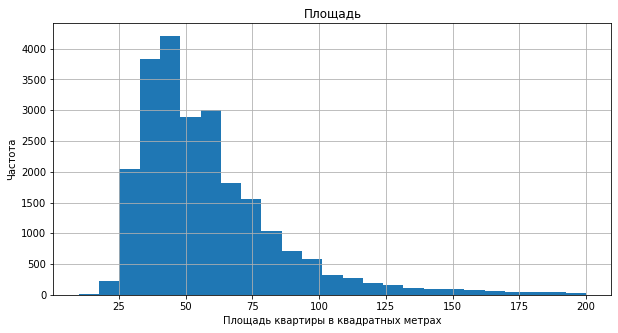

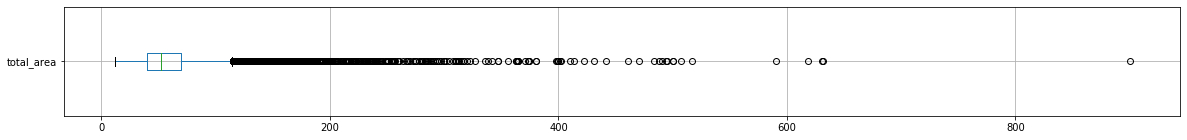

In [ ]:
# строим график гистограмму с параметрами
df['total_area'].plot(kind='hist', bins=25, title='Площадь', grid=True, range=(10, 200), figsize=(10, 5))
plt.ylabel('Частота')
plt.xlabel('Площадь квартиры в квадратных метрах')
plt.show()
df.boxplot(column='total_area', vert=0, figsize=(20, 2))
plt.show()

Видим явные выбросы, где площадь более 200.  
При этом можно сказать, наиболее популярные кваритры площадью в районе 30 - 50.

Рассмотрим признак цена `'last_price'`:

In [ ]:
df['last_price'].describe()

count    23699.000000
mean         6.541548
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Построим гистограмму и boxplot:

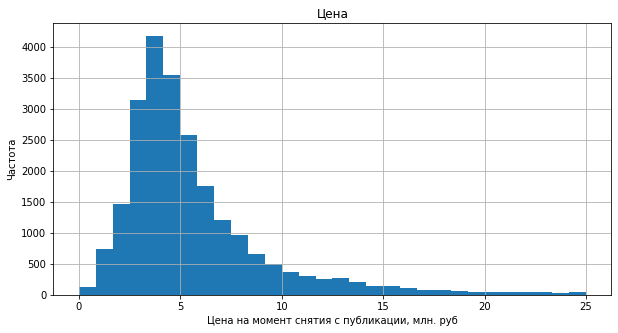

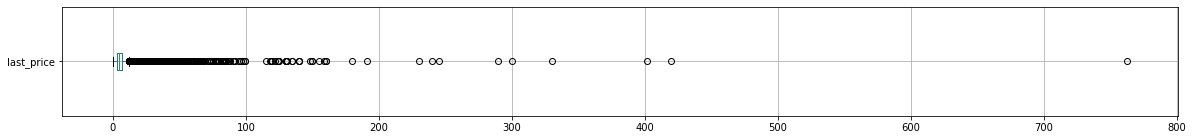

In [ ]:
df['last_price'].plot(kind='hist', bins=30, title='Цена', grid=True, range=(0, 25), figsize=(10, 5))
plt.ylabel('Частота')
plt.xlabel('Цена на момент снятия с публикации, млн. руб')
plt.show()
df.boxplot(column='last_price', vert=0, figsize=(20, 2))
plt.show()

Имеются выбросы, с ценой выше 250 млн. руб.  
Медианная цена 4,65 млн. руб.

Рассмотрим признак количество комнат `'rooms'`:

In [ ]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму и boxplot:

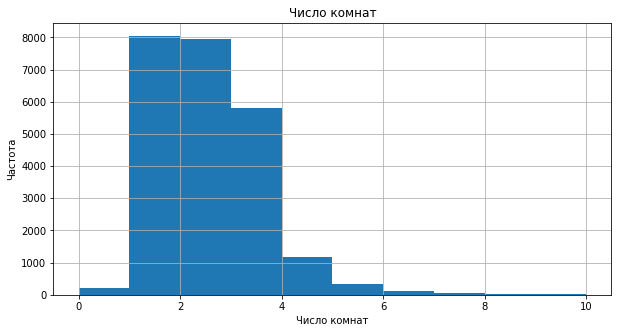

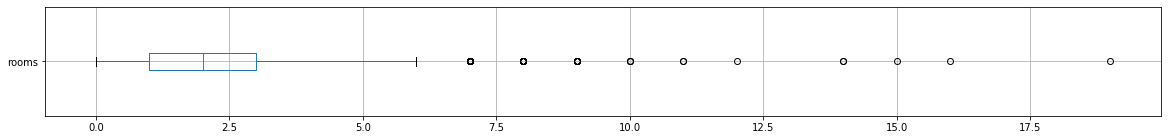

In [ ]:
df['rooms'].plot(kind='hist', bins=10, title='Число комнат', grid=True, range=(0, 10), figsize=(10, 5))
plt.ylabel('Частота')
plt.xlabel('Число комнат')
plt.show()
df.boxplot(column='rooms', vert=0, figsize=(20, 2))
plt.show()

В столбце с комнатами присутствуют выбросы, с числом комнат более 7.  
Наиболее массовые квартиры это 1-3 комнатные.

Рассмотрим признак высоту потолков `'ceiling_height'`:

In [ ]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Построим гистограмму и boxplot:

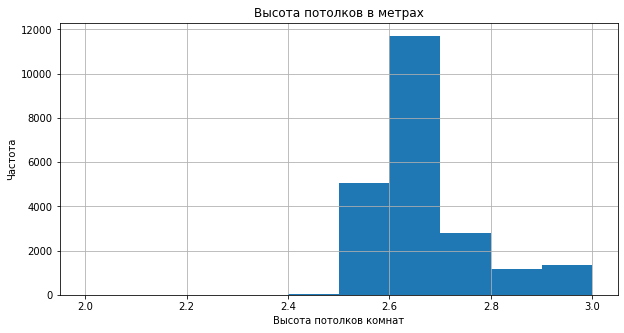

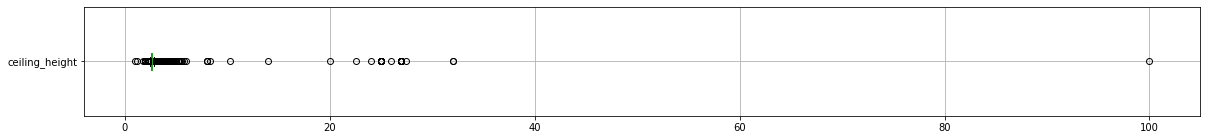

In [ ]:
df['ceiling_height'].plot(kind='hist', bins=10, title='Высота потолков в метрах', grid=True, range=(2, 3), figsize=(10, 5))
plt.ylabel('Частота')
plt.xlabel('Высота потолков комнат')
plt.show()
df.boxplot(column='ceiling_height', vert=0, figsize=(20, 2))
plt.show()

Имеются странные значения высоты потолка, при этом явно можно отрезать выбросы с потолками выше 4 м.

### Время продажи квартиры

Посмотрим среднее и медиану времени продажи квартиры:

In [ ]:
df['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму:

Text(0.5, 0, 'Cколько дней было размещено объявление (от публикации до снятия)')

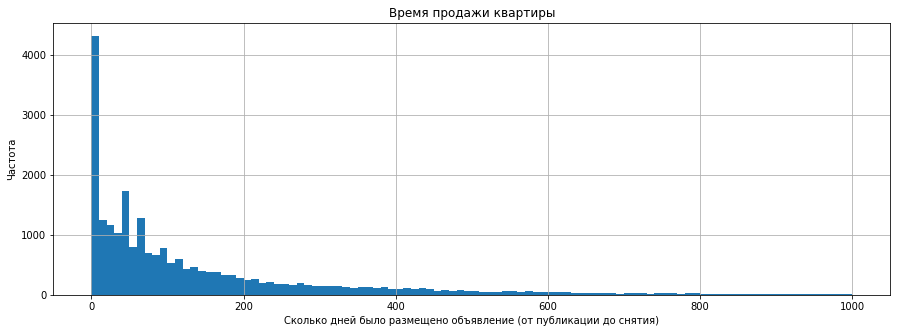

In [ ]:
df['days_exposition'].plot(kind='hist', bins=100, title='Время продажи квартиры', grid=True, range=(0, 1000), figsize=(15, 5))
plt.ylabel('Частота')
plt.xlabel('Cколько дней было размещено объявление (от публикации до снятия)')

Построим boxplot:

Text(0.5, 0, 'Cколько дней было размещено объявление (от публикации до снятия)')

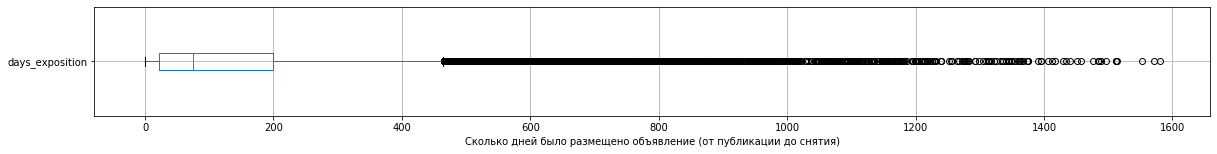

In [ ]:
df.boxplot(column='days_exposition', vert=0, figsize=(20, 2))
plt.xlabel('Cколько дней было размещено объявление (от публикации до снятия)')

Среднее время продажи: 180 дней.  
Медианное время продажи: 95 дней.  
Быстрые продажи: менее 45 дней.  
Долгие продажи: более 231 дня.

### Редкие и выбивающиеся значения


Исходя из критериев определенных выше, можно отсеить следующие значения:

- признак площадь - `'total_area'`: более 200 м2;
- признак цена `'last_price'`:  более 250 млн. руб. 
- признак количество комнат `'rooms'`:  более 7 комнат 
- признак высоту потолков `'ceiling_height'`:  менее 2 м., и более 10 м; 
- признак время продажи `'days_exposition'`: более 600 дней.

In [ ]:
# количество строк в данных
number_cells = len(df)

# применим логическую индексацию согласно критериев
df = df[
        (df['total_area'] < 200) 
        & (df['last_price'] < 250) 
        & (df['rooms'] < 7) 
        & ((df['ceiling_height'] < 10) & (df['ceiling_height'] > 1.5))
        & (df['days_exposition'] < 600)
        ]

# количество строк в отфильтрованных данных
number_cells_new = len(df)

Посмотрим какой процент данных мы отфильтровали:

In [ ]:
f'Было строк: {number_cells}. Стало строк: {number_cells_new}. Доля удаленных строк: {((number_cells - number_cells_new)/number_cells):.1%}'

'Было строк: 23699. Стало строк: 22245. Доля удаленных строк: 6.1%'

Отфильтрованные значения выбраны достаточно корректно.  
Удалено: `6,1 %` строк от изначального датасета.

### Факторы влияющие на стоимость квартиры

Проверим зависит ли цена от площади, числа комнат, удалённости от центра.  
Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.  
Также изучим зависимость от даты размещения: дня недели, месяца и года.

Посмотрим корреляцию признаков:

In [ ]:
df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.714881,0.416802,-0.297836
total_area,0.714881,1.000000,0.782794,-0.230973
rooms,0.416802,0.782794,1.000000,-0.156335
city_centers_nearest,-0.297836,-0.230973,-0.156335,1.000000


Построим матрицу диаграмм рассеяния:

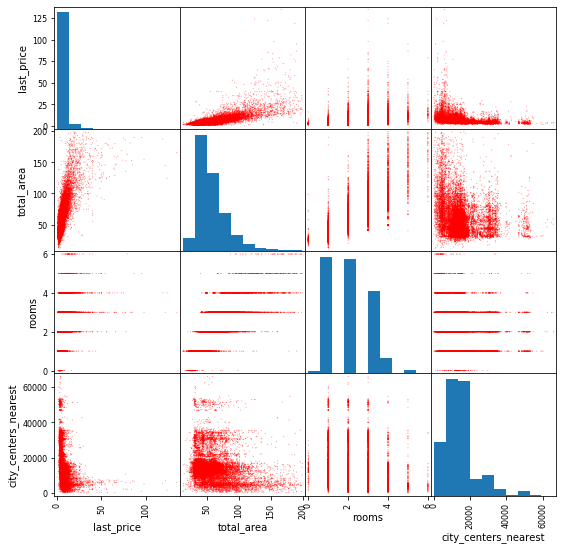

In [ ]:
pd.plotting.scatter_matrix(df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9), color='r', s=4)
plt.show()

#### Цена от площади

Для оценки зависимости цены от площади разобьем на 10 равных частей по площади:

In [ ]:
df['total_area2'] = pd.qcut(df['total_area'], 10)
df.groupby('total_area2')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
total_area2,,,
"(11.999, 32.9]",2244,2.847387,2.95
"(32.9, 37.2]",2225,3.430675,3.45
"(37.2, 42.0]",2400,3.892883,3.90
"(42.0, 45.5]",2059,3.898355,3.95
"(45.5, 51.1]",2199,4.396827,4.30
"(51.1, 57.358]",2220,4.853627,4.90
"(57.358, 63.5]",2236,5.350770,5.19
"(63.5, 73.0]",2215,6.624643,6.45
"(73.0, 90.0]",2292,8.243583,7.60


Построим столбчатый график:

Text(0, 0.5, 'Цена, млн. руб.')

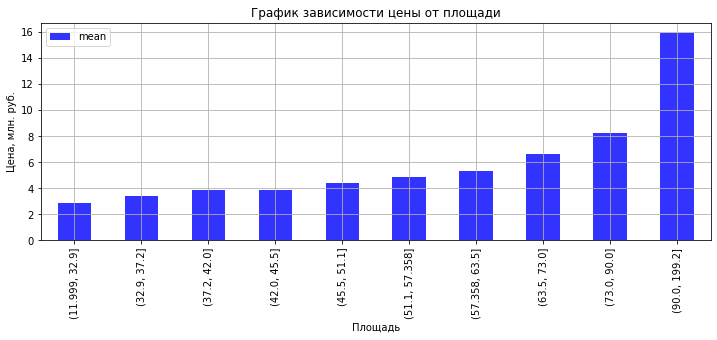

In [ ]:
# проведем группировку и построим график
df.groupby('total_area2')['last_price'].agg(['mean']).plot(
    kind='bar', grid=True, figsize=(12, 4), color='b', legend=True, linewidth=2.5, alpha=0.8)

plt.title('График зависимости цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена, млн. руб.')

Ожидаемо, чем больше плошадь, тем выше стоимость.  
При этом коэффициент Пирсона: 0,77

 #### Цена от числа комнат

Построим сводную таблицу по признакам количество комнат и цены:

In [ ]:
df.groupby('rooms')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms,,,
0,191,3.005349,2.700000
1,7707,3.819544,3.600000
2,7564,5.516888,4.750000
3,5452,7.932275,6.177621
4,1039,11.667352,8.750000
5,235,15.206776,12.500000
6,57,16.969435,14.500000


Построим график зависимости цены от количества комнат:

Text(0, 0.5, 'Цена, млн. руб.')

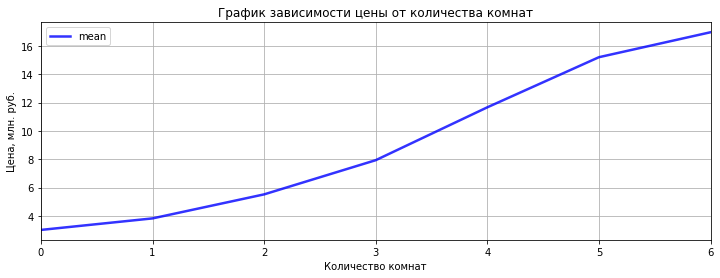

In [ ]:
df.groupby('rooms')['last_price'].agg(['mean'])['mean'].plot(
    grid=True, figsize=(12, 4), color='b', legend=True, linewidth=2.5, alpha=0.8)

plt.title('График зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн. руб.')

Видим прямую линейную зависимость цены от количества комнат.  
Ожидаемо, чем больше комнат, тем выше цена квартиры

 #### Цена от удаленности от центра

Разобъем признак расстояние до центра на 15 равных частей и переведем в км:

In [ ]:
df['city_centers_nearest2'] = pd.qcut((df['city_centers_nearest']/1000), 15)
df.groupby('city_centers_nearest2')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
city_centers_nearest2,,,
"(0.18, 4.256]",1133,11.599475,9.0000
"(4.256, 5.818]",1132,11.501323,8.9000
"(5.818, 8.344]",1134,11.368394,7.5000
"(8.344, 10.087]",1131,7.079003,5.5000
"(10.087, 11.27]",1137,6.297789,5.0000
"(11.27, 12.062]",1131,5.716789,4.9500
"(12.062, 12.831]",1131,5.994186,5.0950
"(12.831, 13.671]",1134,5.946808,5.1000
"(13.671, 14.562]",1132,5.589104,4.9000


Построим график зависимости цены от расстояния до центра:

Text(0, 0.5, 'Цена, млн. руб.')

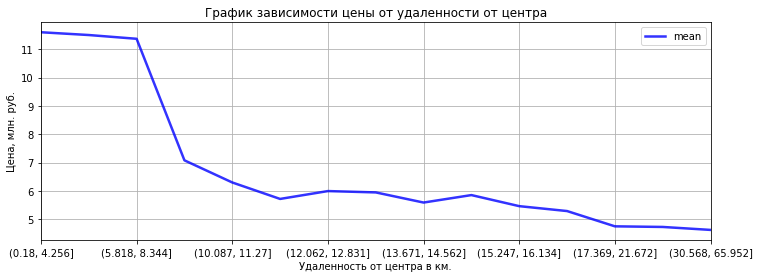

In [ ]:
df.groupby('city_centers_nearest2')['last_price'].agg(['mean'])['mean'].plot(
    grid=True, figsize=(12, 4), color='b', legend=True, linewidth=2.5, alpha=0.8)

plt.title('График зависимости цены от удаленности от центра')
plt.xlabel('Удаленность от центра в км.')
plt.ylabel('Цена, млн. руб.')

Примерно до 5 км. цена квартиры почти не меняется, далее чем дальше от центра, тем ниже стоимость

#### Цена взависимости от этажа

Рассмотрим средние значения по этажам:

In [ ]:
df.groupby('floor_kind')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
floor_kind,,,
другой,16435,6.191254,4.799
первый,2734,4.589160,3.899
последний,3076,5.640752,4.200


Построим график зависимости цены от этажности:

Text(0.5, 0, 'Стоимость')

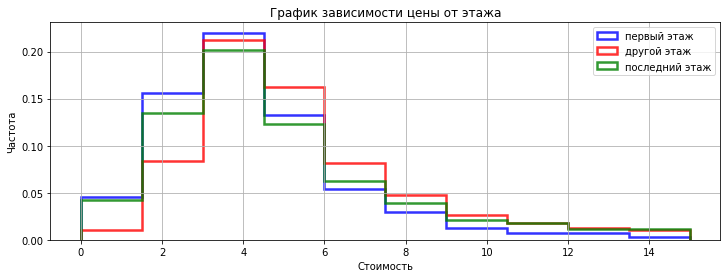

In [ ]:
# проведем логическую индексацию и построим график
df[df['floor_kind'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 15), bins=10, label='первый этаж', grid=True, legend=True, linewidth=2.5, alpha=0.8)

df[df['floor_kind'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    range=(0, 15), bins=10, label='другой этаж', grid=True, legend=True, linewidth=2.5, alpha=0.8)

df[df['floor_kind'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='g', 
    range=(0, 15), bins=10, label='последний этаж', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.title('График зависимости цены от этажа')
plt.ylabel('Частота')
plt.xlabel('Стоимость')

В среднем первый этаж стоит 4,3 млн. руб, последний 5,39 млн. руб, другие 5,91 млн. руб.

#### Цена от даты размещения

Посмотрим средние значения по дням неделям:

In [ ]:
df.sort_values(['weekday'],ascending=False).groupby('weekday')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
weekday,,,
0,3397,5.975400,4.6000
1,3929,5.934372,4.6750
2,3701,5.868796,4.6000
3,3995,6.125392,4.5936
4,3799,5.809681,4.5000
5,1828,5.856784,4.5000
6,1596,5.681618,4.5000


Text(0.5, 0, 'День недели')

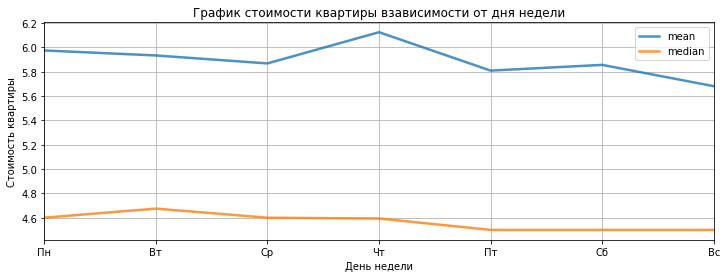

In [ ]:
df.groupby('weekday')['last_price'].agg(['mean', 'median']).plot(
    grid=True, figsize=(12, 4), legend=True, linewidth=2.5, alpha=0.8)

plt.xticks(range(7), ['Пн','Вт','Ср','Чт', 'Пт','Сб', 'Вс'])
plt.title('График стоимости квартиры взависимости от дня недели')
plt.ylabel('Стоимость квартиры')
plt.xlabel('День недели')

Цена расчет до четверга, снижась в пятницу, и немного поднимается в субботу. При этом видно, что в выходные дни размещают мало объявлений

Посмотрим средние значения по месяцам:

In [ ]:
df.groupby('month')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
month,,,
1,1394,5.845301,4.55
2,2501,6.060751,4.60
3,2386,5.806507,4.60
4,2259,5.953671,4.75
5,1168,5.883731,4.50
6,1638,5.783906,4.35
7,1588,5.991916,4.60
8,1670,5.983244,4.55
9,1871,5.996791,4.60


Построим график цены взависимости от месяца:

Text(0.5, 0, 'Месяц')

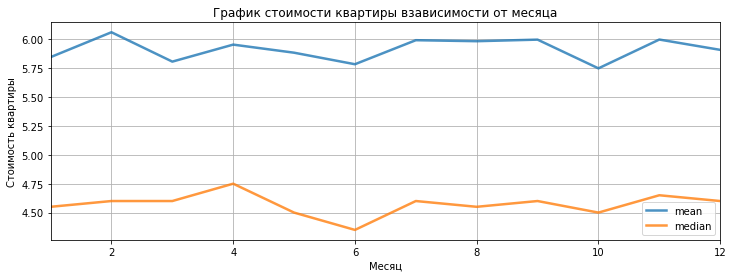

In [ ]:
df.groupby('month')['last_price'].agg(['mean', 'median']).plot(
    grid=True, figsize=(12, 4), legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости квартиры взависимости от месяца')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Месяц')

Цена немного проседает в начале лета, и потом растет к концу года. При этом наибольшая активность в феврале и в ноябрe

Посмотрим среднее по годам:

In [ ]:
df.groupby('year')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
2014,46,12.742363,9.05
2015,651,7.323101,5.10
2016,2305,5.965936,4.45
2017,7952,5.899939,4.50
2018,8447,5.631465,4.55
2019,2844,6.350460,5.00


Построим график цены взависимости от года:

Text(0.5, 0, 'Год')

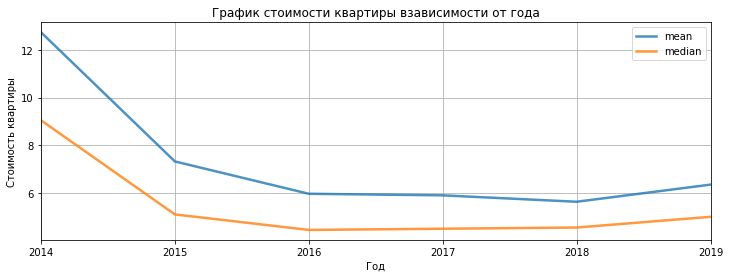

In [ ]:
df.groupby('year')['last_price'].agg(['mean', 'median']).plot(
    grid=True, figsize=(12, 4), legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости квартиры взависимости от года')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Год')

Видны сплески в 2014, 2015, но из-за небольшой выборки, сложно оценить данные подъемы цены. В целом цена равномерная, и не сильно менялась по годам

#### Вывод

- Чем больше плошадь квартиры, тем выше стоимость.
- Чем больше комнат, тем выше цена квартиры.
- Примерно до 5 км. от центра цена квартиры почти не меняется, далее чем дальше от центра, тем ниже стоимость.
- В среднем первый этаж стоит 4,3 млн. руб, последний 5,39 млн. руб, другие 5,91 млн. руб.
- Цена кваритры расчет до четверга, снижась в пятницу, и немного поднимается в субботу. 
- При этом видно, что в выходные дни размещают мало объявлений.
- Цена немного проседает в начале лета, и потом растет к концу года. При этом наибольшая активность в феврале и в ноябрe.
- Видны сплески в 2014, 2015, но из-за небольшой выборки, сложно оценить данные подъемы цены. В целом цена равномерная, и не сильно менялась по годам.

### Топ 10 населенных пунктов


Посмотрим топ 10 населенных пунктов с наибольшим числом объявлений:

In [ ]:
df.groupby('locality_name')['square_meter_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14650,113076.521024
Мурино,568,86203.149648
Кудрово,448,95610.676339
Шушары,426,78660.741784
Всеволожск,377,68718.618037
Пушкин,346,102972.361272
Колпино,328,75206.783537
Парголово,317,90166.476341
Гатчина,288,68980.958333


Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая в Выборге, 108007 руб. за м2 и 57181 руб. за м2 соотвественно.

### Удаленность от центра

 

Для удобства работы определим датасет в которым поместим объявления только с СПБ:

In [ ]:
df_spb = df # определим датасет СПБ
df_spb.dropna(subset = ['city_centers_nearest'], inplace = True) # удалим пустые значения до центра
df_spb['city_centers_nearest_km'] = ((df_spb['city_centers_nearest']/1000).round()).astype(int) # создадим столбец с км
df_spb = df_spb[df_spb['locality_name'] == 'Санкт-Петербург'] # оставим значения только СПБ

Посторим график средней цены за кв. м зависящий от расстояния до центра:

Text(0.5, 0, 'Расстояние до центра, км')

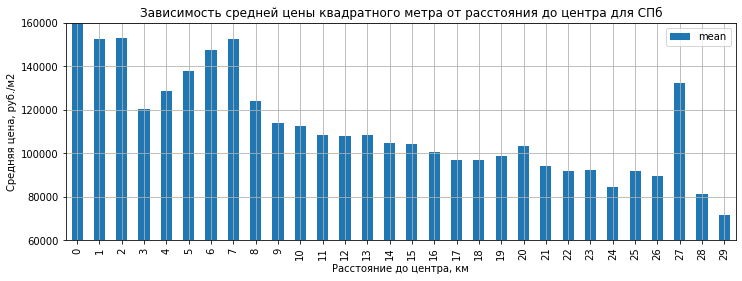

In [ ]:
# составим сводную таблицу цены за м2 и удаленности от центра в СПБ
df_spb.groupby('city_centers_nearest_km')['square_meter_price'].agg(
    ['mean']).plot(kind='bar', grid=True, figsize=(12, 4)
    )

plt.ylim(60000, 160000)
plt.title('Зависимость средней цены квадратного метра от расстояния до центра для СПб')
plt.ylabel('Средняя цена, руб./м2')
plt.xlabel('Расстояние до центра, км')

Начиная с 8 км, цена за кв. м2 начинает стабилизироваться и небалюдается резких скачков.  
По этой причине можно сделать вывод, что центр - 8 км.

### Факторы влияющие на стоимость квартиры в центре

#### Изучение площади, цены, числа комнат, высоты потолков в центре

Создадим датафрейм в который поместим только объявления входящие в категорию центр:

In [ ]:
df_spb_center = df_spb[df_spb['city_centers_nearest_km'] <= 8]

Построим гистрограмму общей площади для СПб и центра СПб:

Text(0.5, 0, 'Общая площадь, м2')

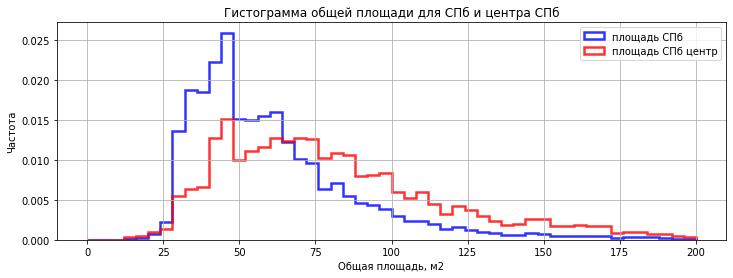

In [ ]:
# строим график для центра СПб, передадим ему график для СПб
ax = df_spb.plot(kind='hist', y='total_area', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 200), bins=50, label='площадь СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(kind='hist', y='total_area', histtype='step', ax=ax, density=True, figsize=(12, 4), color='r',
    range=(0, 200), bins=50, label='площадь СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.title('Гистограмма общей площади для СПб и центра СПб')
plt.ylabel('Частота')
plt.xlabel('Общая площадь, м2')

Построим гистрограмму количества комнат для СПб и центра СПб:

Text(0.5, 0, 'Количество комнат')

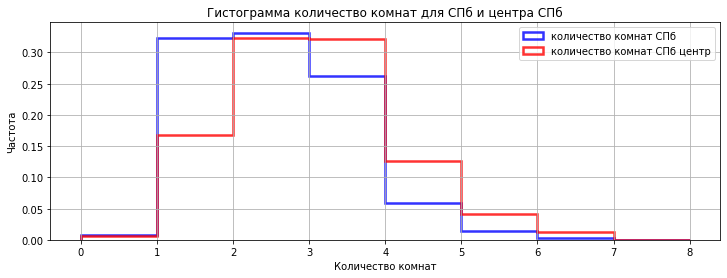

In [ ]:
ax = df_spb.plot(
    kind='hist', y='rooms', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 8), bins=8, label='количество комнат СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(
    kind='hist', y='rooms', histtype='step', ax=ax, density=True, figsize=(12, 4), color='r',
    range=(0, 8), bins=8, label='количество комнат СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.title('Гистограмма количество комнат для СПб и центра СПб')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')

Построим гистрограмму стоимости для СПб и центра СПб:

Text(0.5, 0, 'Стоимость квартиры')

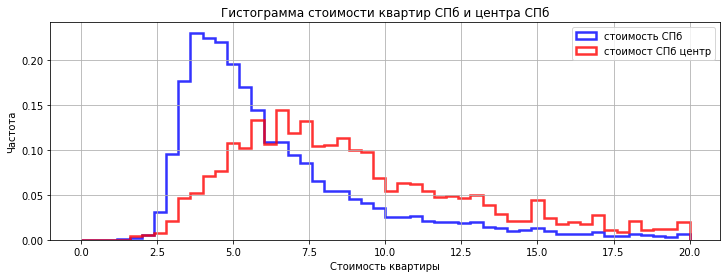

In [ ]:
ax = df_spb.plot(
    kind='hist', y='last_price', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 20), bins=50, label='стоимость СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(
    kind='hist', y='last_price', histtype='step', ax=ax, density=True, figsize=(12, 4), color='r',
    range=(0, 20), bins=50, label='стоимост СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.title('Гистограмма стоимости квартир СПб и центра СПб')
plt.ylabel('Частота')
plt.xlabel('Стоимость квартиры')

Построим гистрограмму высоты потолков для СПб и центра СПб:

Text(0.5, 0, 'Высота потолков')

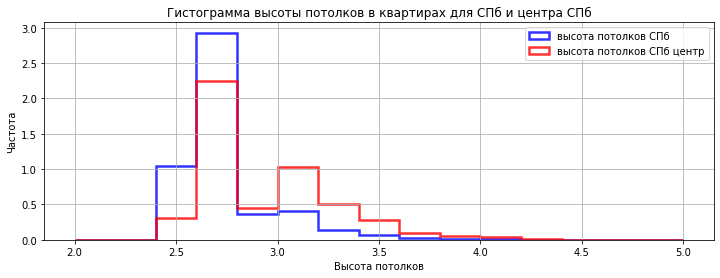

In [ ]:
ax = df_spb.plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(2, 5), bins=15, label='высота потолков СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(
    kind='hist', y='ceiling_height', histtype='step', ax=ax, density=True, figsize=(12, 4), color='r',
    range=(2, 5), bins=15, label='высота потолков СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.title('Гистограмма высоты потолков в квартирах для СПб и центра СПб')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')

##### Вывод

Средняя площадь , цена, число комнат, а также высота потолков квартир в центре СПб больше, чем в среднем для СПб.

#### Факторы влияющие на стоимость квартиры в центре

Посмотрим корреляцию признаков выведем корреляции для СПб и для центра СПб:

In [ ]:
df_spb[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.728061,0.434759,-0.359454
total_area,0.728061,1.000000,0.781735,-0.341550
rooms,0.434759,0.781735,1.000000,-0.256193
city_centers_nearest,-0.359454,-0.341550,-0.256193,1.000000


In [ ]:
df_spb_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.648639,0.349391,-0.069249
total_area,0.648639,1.000000,0.775057,-0.162640
rooms,0.349391,0.775057,1.000000,-0.201939
city_centers_nearest,-0.069249,-0.162640,-0.201939,1.000000


Исходя из корреляционных зависимостей, можно сделать выводы для центра СПб в сравнении с СПб:  
- Цена продажи менее зависит от расстояния до центра, практически не зависит, коэф. Пирсона = `-0.069`
- Зависимости цены продажи от общей площади и количества комнат менее выраженны.

##### Число комнат

Построим график сравнения цены взависимоти от количества комнат для СПб и центра СПб:

Text(0.5, 0, 'Количество комнат')

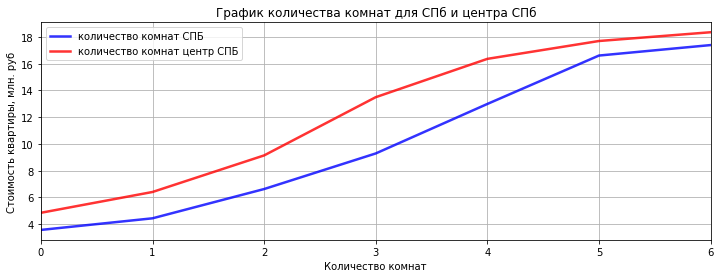

In [ ]:
df_spb.groupby('rooms')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='b', label='количество комнат СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

df_spb_center.groupby('rooms')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='r', label='количество комнат центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

plt.title('График количества комнат для СПб и центра СПб')
plt.ylabel('Стоимость квартиры, млн. руб')
plt.xlabel('Количество комнат')

Text(0.5, 0, 'Количество комнат')

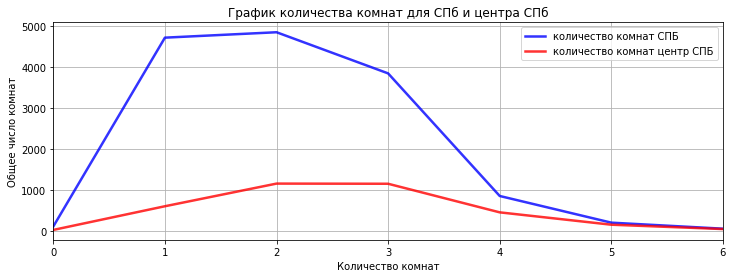

In [ ]:
df_spb.groupby('rooms')['last_price'].agg(['count'])['count'].plot(
    figsize=(12, 4), color='b', label='количество комнат СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

df_spb_center.groupby('rooms')['last_price'].agg(['count'])['count'].plot(
    figsize=(12, 4), color='r', label='количество комнат центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

plt.title('График количества комнат для СПб и центра СПб')
plt.ylabel('Общее число комнат')
plt.xlabel('Количество комнат')

В серднем наблюдаем линейный положительный рост цены квартиры взависимоти от количества комнат. При этом цена в центре СПб выше, чем для СПб в целом, ожидаемо.

##### Этаж

Рассмотрим средние значения по этажам:

In [ ]:
df_spb_center.groupby('floor_kind')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
floor_kind,,,
другой,2589,11.988355,8.9710
первый,398,8.193724,6.2995
последний,574,11.195395,8.5000


Построим график сравнения цены взависимоти от этажа для СПб и центра СПб:

Text(0.5, 0, 'Стоимость')

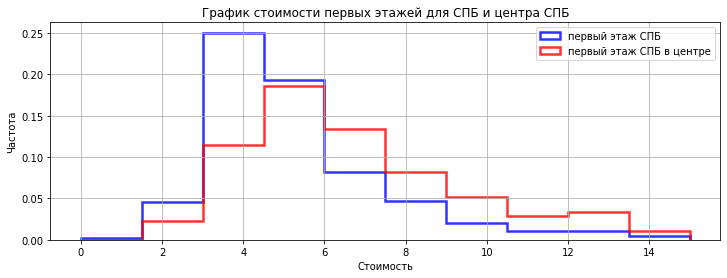

In [ ]:
df_spb[df_spb['floor_kind'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 15), bins=10, label='первый этаж СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_kind'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    range=(0, 15), bins=10, label='первый этаж СПБ в центре', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости первых этажей для СПБ и центра СПБ')
plt.ylabel('Частота')
plt.xlabel('Стоимость')

Стоимость квартир на первой этаже в среднем немного выше для центра СПб, при этом в среднем как в целом городу

Text(0.5, 0, 'Стоимость')

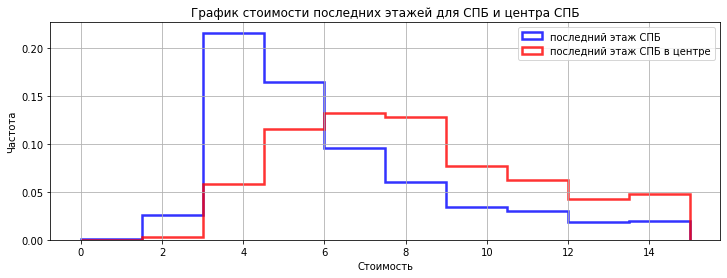

In [ ]:
df_spb[df_spb['floor_kind'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 15), bins=10, label='последний этаж СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_kind'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    range=(0, 15), bins=10, label='последний этаж СПБ в центре', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости последних этажей для СПБ и центра СПБ')
plt.ylabel('Частота')
plt.xlabel('Стоимость')

Цена последних этажей для центра СПб выше, чем в среднем по СПб

Text(0.5, 0, 'Стоимость')

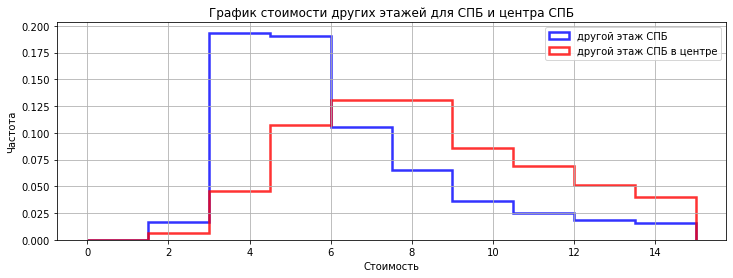

In [ ]:
df_spb[df_spb['floor_kind'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 15), bins=10, label='другой этаж СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_kind'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    range=(0, 15), bins=10, label='другой этаж СПБ в центре', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости других этажей для СПБ и центра СПБ')
plt.ylabel('Частота')
plt.xlabel('Стоимость')

Средняя цена других этаже выше для центра СПб

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Стоимость')

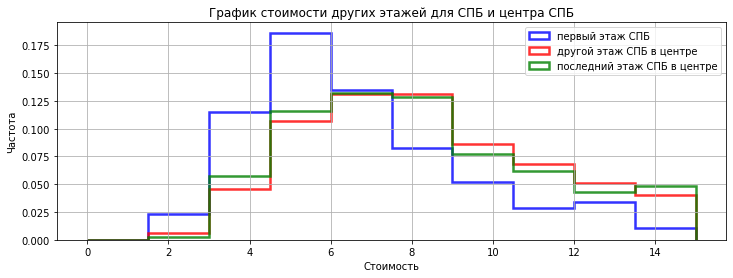

In [ ]:
df_spb_center[df_spb['floor_kind'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    range=(0, 15), bins=10, label='первый этаж СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)

df_spb_center[df_spb_center['floor_kind'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    range=(0, 15), bins=10, label='другой этаж СПБ в центре', grid=True, legend=True, linewidth=2.5, alpha=0.8)

df_spb_center[df_spb_center['floor_kind'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='g', 
    range=(0, 15), bins=10, label='последний этаж СПБ в центре', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости других этажей для СПБ и центра СПБ')
plt.ylabel('Частота')
plt.xlabel('Стоимость')

Доля квартир на первем этаже больше, чем на других, но и средняя цена ниже

##### Удалённость от центра

Построим график сравнения цены взависимоти от удаленности для центра СПб:

Text(0.5, 0, 'Удаленность от центра, км')

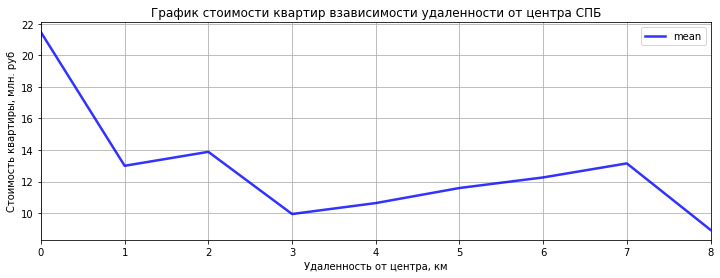

In [ ]:
df_spb_center.groupby('city_centers_nearest_km')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='b', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 
plt.title('График стоимости квартир взависимости удаленности от центра СПБ')
plt.ylabel('Стоимость квартиры, млн. руб')
plt.xlabel('Удаленность от центра, км')

В целом тренд цены взависимсоти от удаленностир от центра такое же как и в целом по СПб, но небольшая просадка цены в районе 3 км, выглядит не понятно

##### Дата размещения объявления

Посмотрим средние значения по дням неделям:

Text(0.5, 0, 'День недели')

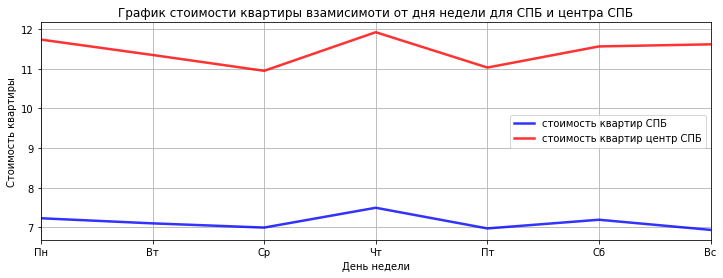

In [ ]:
df_spb.groupby('weekday')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='b', label='стоимость квартир СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)

df_spb_center.groupby('weekday')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='r', label='стоимость квартир центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)

plt.xticks(range(7), ['Пн','Вт','Ср','Чт', 'Пт','Сб', 'Вс'])
plt.title('График стоимости квартиры взамисимоти от дня недели для СПБ и центра СПБ')
plt.ylabel('Стоимость квартиры')
plt.xlabel('День недели')

Построим график цены взависимости от месяца:

Text(0.5, 0, 'Месяц')

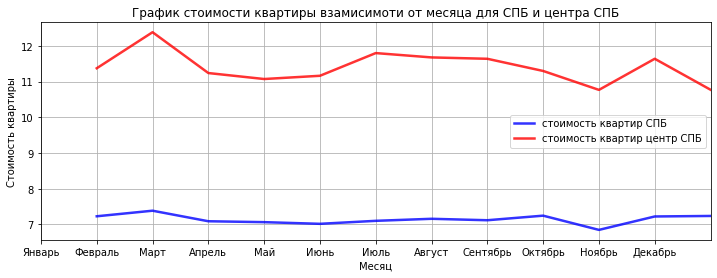

In [ ]:
df_spb.groupby('month')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='b', label='стоимость квартир СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)

df_spb_center.groupby('month')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='r', label='стоимость квартир центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)
plt.xticks(range(12), ['Январь','Февраль','Март','Апрель', 'Май','Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.title('График стоимости квартиры взамисимоти от месяца для СПБ и центра СПБ')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Месяц')

Построим график цены взависимости от года:

Text(0.5, 0, 'Год')

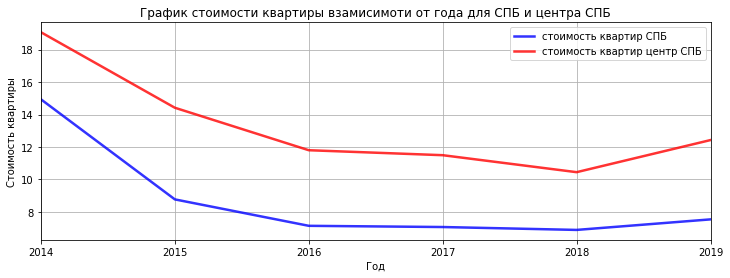

In [ ]:
df_spb.groupby('year')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='b', label='стоимость квартир СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)

df_spb_center.groupby('year')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), color='r', label='стоимость квартир центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8)

plt.title('График стоимости квартиры взамисимоти от года для СПБ и центра СПБ')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Год')

По дням недели, активность размещения объявлений в начале неделе выше, чем в других днях, а по месяцам, а также по годам, тренд такойже как и в целом СПб

##### Вывод

- В центре СПб больше распространены 2-3 комнатные квартиры.
- Более нормальное распределение стоимостей квартир в центре.
- Стоимость последних этаже в среднем выше относительно других этажей.
- Цена продажи менее зависит от расстояния до центра.
- Зависимости цены продажи от общей площади и количества комнат менее выраженны.

## Общий вывод

При осмотре данных, видно:  
- имеется большое количество пропущенных значений;
- столбец с датами, потребуется привести к формату даты;
- наименование столбца 'cityCenters_nearest' привести к "змеиному" виду;
- явно имеются некорректные максимальные и минимальные значения (выборосы), например: высота потолков, возможно балконы и т.д.

При предобработке данных:
- заменили пропущенные значения, кроме в двух столбцах: 'city_centers_nearest' и 'days_exposition', так как точно определить расстояние до центра мы не можем, а пропущенные значения в днях публикации, могут быть связаны с тем, что объявление еще не снято;
- при изменении типов данных удалось снизить размер датасета с 2,7+ MB до 1,2 MB.

Для СПб в целом характерно:
- Чем больше плошадь квартиры, тем выше стоимость.
- Чем больше комнат, тем выше цена квартиры.
- Примерно до 5 км. от центра цена квартиры почти не меняется, далее чем дальше от центра, тем ниже стоимость.
- В среднем первый этаж стоит 4,3 млн. руб, последний 5,39 млн. руб, другие 5,91 млн. руб.
- Цена кваритры расчет до четверга, снижась в пятницу, и немного поднимается в субботу. 
- При этом видно, что в выходные дни размещают мало объявлений.
- Цена немного проседает в начале лета, и потом растет к концу года. При этом наибольшая активность в феврале и в ноябрe.
- Видны сплески в 2014, 2015, но из-за небольшой выборки, сложно оценить данные подъемы цены. В целом цена равномерная, и не сильно менялась по годам.

Для центра СПб характерно:
- Средняя площадь , цена, число комнат, а также высота потолков квартир в центре СПб больше, чем в среднем для СПб.
- В центре СПб больше распространены 2-3 комнатные квартиры.
- Более нормальное распределение стоимостей квартир в центре.
- Стоимость последних этаже в среднем выше относительно других этажей.
- Цена продажи менее зависит от расстояния до центра.
- Зависимости цены продажи от общей площади и количества комнат менее выраженны.